# Exploratory Data Analysis for Concrete Strength Prediction

### Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

### Loading Data

In [2]:
pd.set_option("display.max_columns",None)
data_path="C:/Users/Bala/Projects/Internship/ConcreteStrengthPrediction/raw_data/concrete_data.csv"
df=pd.read_csv(data_path)
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Observations

1. This Dataset consists of 9 features listed below : 
     * cement - kg in a m3 mixture
     * blast_furnace_slag - kg in a m3 mixture
     * fly_ash - kg in a m3 mixture
     * water - kg in a m3 mixture
     * superplasticizer - kg in a m3 mixture
     * coarse_aggregate - kg in a m3 mixture
     * fine_aggregate - kg in a m3 mixture
     * age - Day (1~365)
     * concrete_compressive_strength - MPa
2. The data type of each feature is shown above
3. 1030 records are present in this dataset

In [5]:
report=ProfileReport(df)
report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
report.to_file("ProfileReport.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Observations from Profile Report

1. There are no missing values present in the dataset
2. Zeros are present in blast_furnace_slag, fly_ash and superplasticizer
3. No categorical Values is present in the dataset
4. Duplicates are present in the dataset
5. No columns with zero standard deviation 

### Handling duplicates

In [7]:
df.drop_duplicates(inplace=True)
print(df.shape[0])

1005


### Analysis and Visualization

Distribution of Each Feature

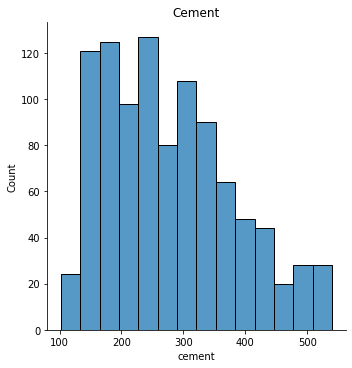

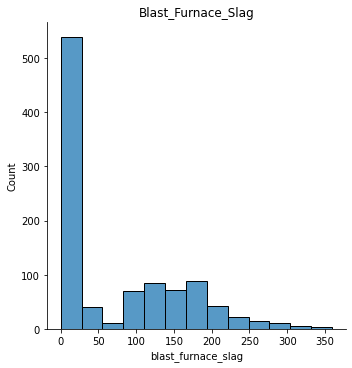

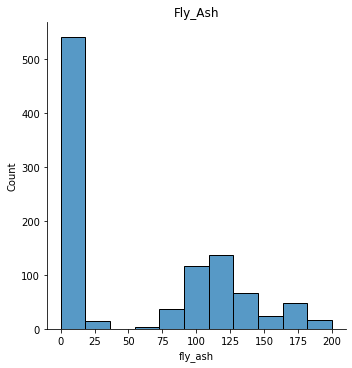

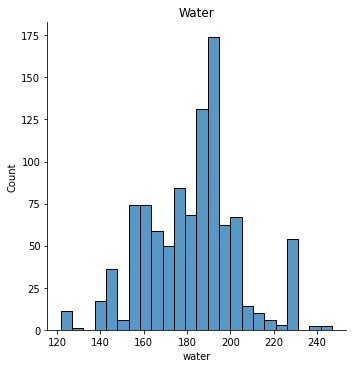

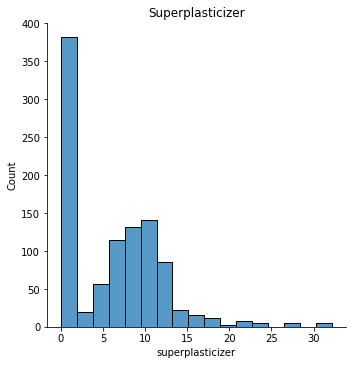

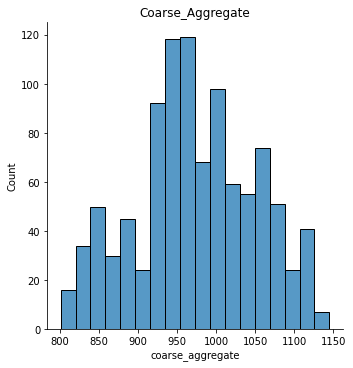

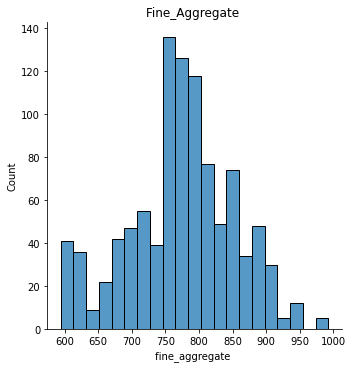

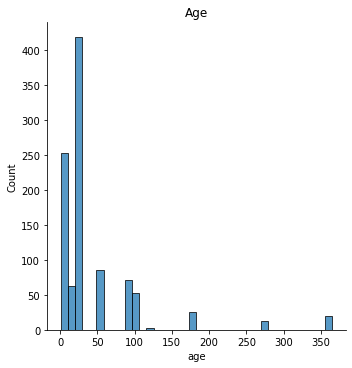

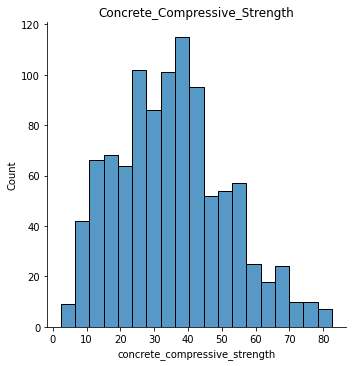

In [8]:
for feature in df.columns:
    sns.displot(df[feature])
    plt.xlabel(feature)
    plt.title(feature.title())
    plt.show()

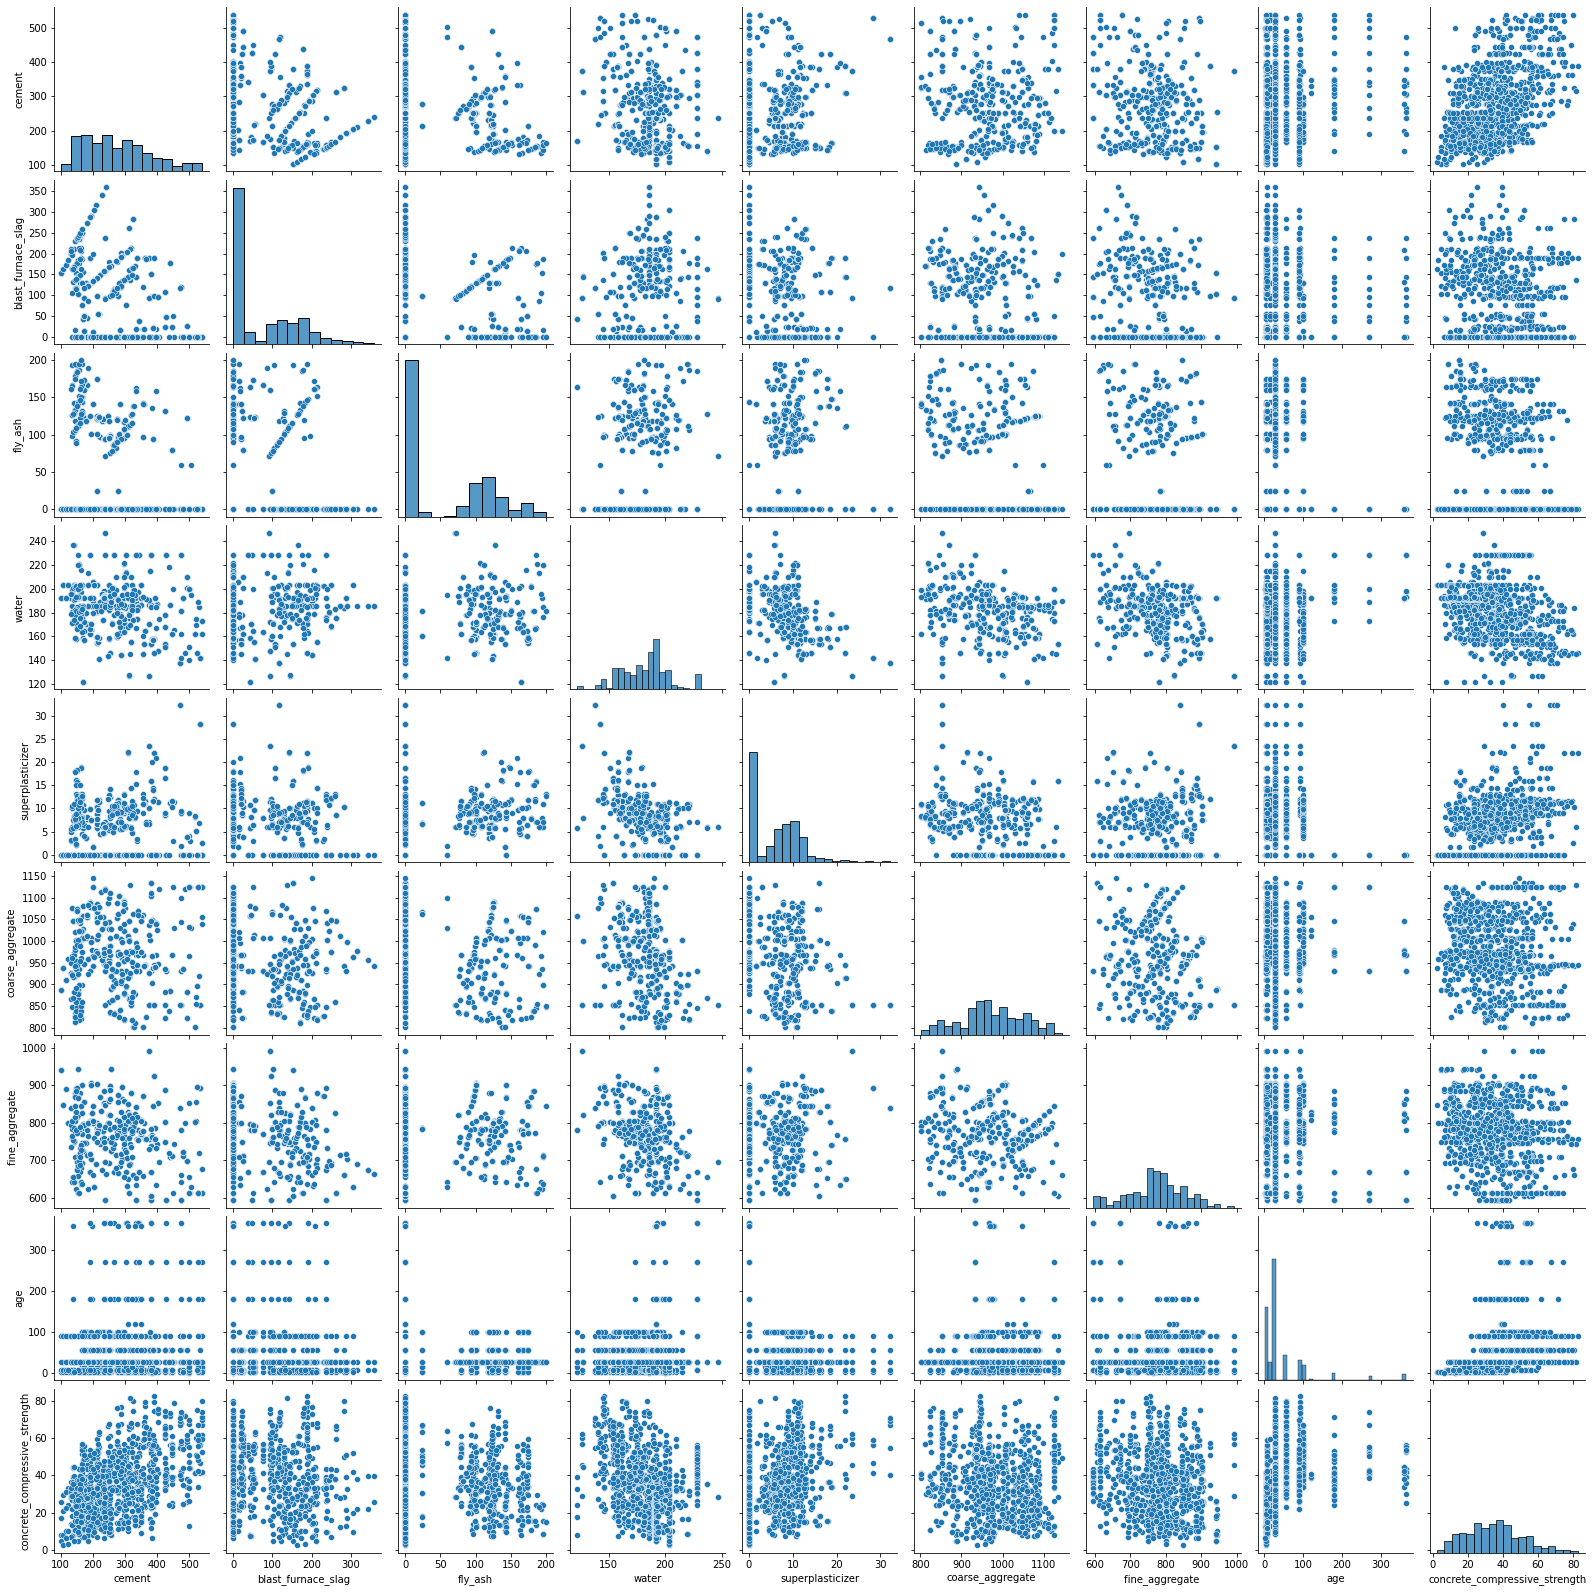

In [9]:
sns.pairplot(df)

Correleation between each feature

(9.5, -0.5)

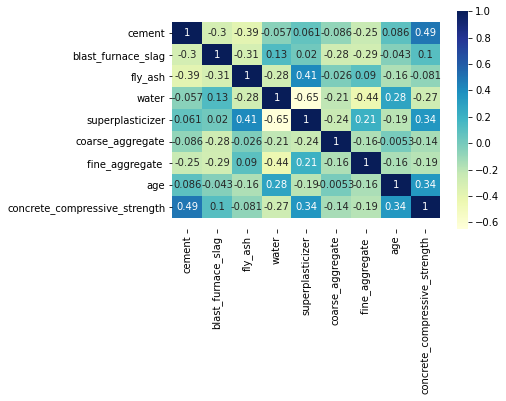

In [10]:
ax = sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Observations
1. Cement is more correlated with the target variable than other features

### Outliers

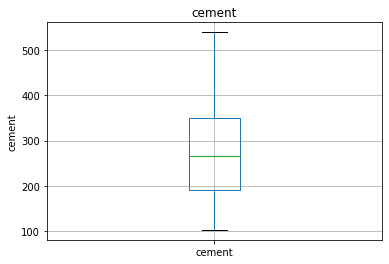

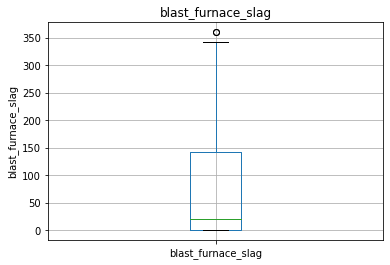

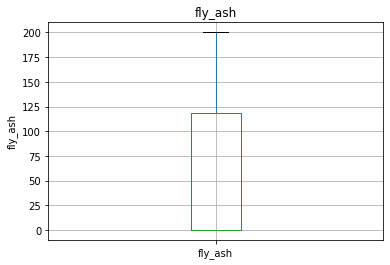

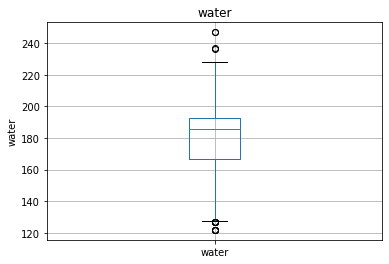

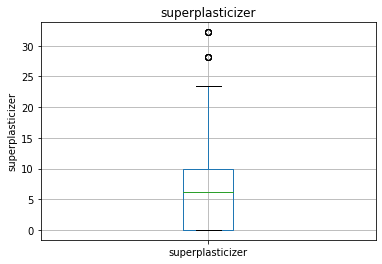

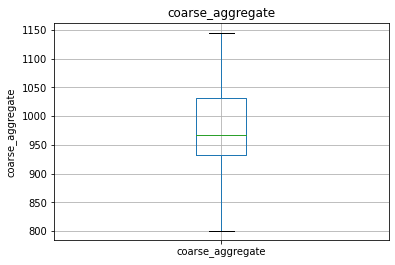

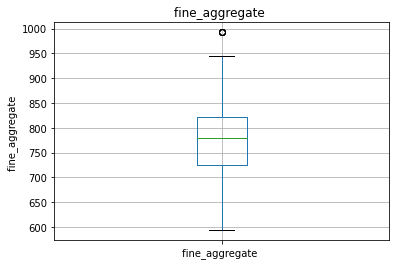

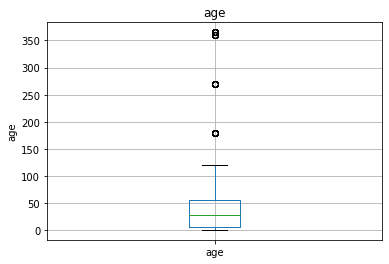

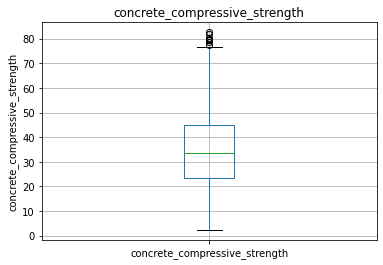

In [11]:
for feature in df.columns:
    data=df.copy()
    data[feature]=data[feature]
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Observations

1. The following features have outliers:
    * Age
    * Fine Aggregate
    * Water
    * Superplasticizer
    * Blast Furnace Slag

In [12]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [13]:
outliers_column=[]
for feature in df.columns:
    sample_outliers = detect_outliers_iqr(df[feature])
    if len(sample_outliers)>0:
        print(f"{feature}", len(sample_outliers))
        outliers_column.append(feature)

blast_furnace_slag 2
water 15
superplasticizer 10
fine_aggregate  5
age 59
concrete_compressive_strength 8


In [14]:
print(outliers_column[-1])

concrete_compressive_strength


Outlier Handling in feature column

In [15]:
for feature in outliers_column[:-1]:
    tenth_percentile = np.percentile(df[feature], 10)
    ninetieth_percentile = np.percentile(df[feature], 90)
    df.loc[df[feature]<tenth_percentile,feature]=tenth_percentile
    df.loc[df[feature]>ninetieth_percentile,feature]=ninetieth_percentile

Outlier Handling in target column

In [16]:
sample_outliers = detect_outliers_iqr(df[outliers_column[-1]])
outliers_index=[]
for outlier in sample_outliers:
    outliers_index.append(df[df[outliers_column[-1]]==outlier].index.values[0])
df.drop(df.index[outliers_index],axis=0,inplace=True)
print(df.shape[0])

997
